<a href="https://colab.research.google.com/github/DATASCIENCE-PROJECT-GROUP/DATASCIENCE---CW/blob/main/MODELLING_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Model 01 - Extreme Gradient Boosting**

In [3]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load dataset
train_data = pd.read_csv("/content/drive/MyDrive/DSPL Cw/preprocessed_data final.csv")

# Display first few rows
train_data.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832,Kelaniya,1209.60,756.00,5292.00,4
1,10178643,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916,Wattala,2288.88,1481.04,9155.52,4
3,10334589,Wattala,2274.94,1739.66,9099.76,4
4,10458365,Kelaniya,2345.49,2069.55,9243.99,4


In [5]:
train_data = train_data.drop(columns=['Customer_ID'])
print(train_data.columns)

Index(['outlet_city', 'luxury_sales', 'fresh_sales', 'dry_sales',
       'cluster_catgeory'],
      dtype='object')


In [6]:
train_data.dtypes

,0
outlet_city,object
luxury_sales,float64
fresh_sales,float64
dry_sales,float64
cluster_catgeory,int64


In [7]:
train_data["outlet_city"] = train_data["outlet_city"].astype("category")

In [8]:
train_data.dtypes

,0
outlet_city,category
luxury_sales,float64
fresh_sales,float64
dry_sales,float64
cluster_catgeory,int64


In [9]:
mapping = {1:0, 2:1, 3:2, 4:3, 5:4, 6:5}
train_data["cluster_catgeory"] = train_data["cluster_catgeory"].map(mapping)

In [10]:
X = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]

In [11]:
print(X)

       outlet_city  luxury_sales  fresh_sales  dry_sales
0         Kelaniya       1209.60       756.00    5292.00
1         Moratuwa       1590.12      1060.08    6007.12
2          Wattala       2288.88      1481.04    9155.52
3          Wattala       2274.94      1739.66    9099.76
4         Kelaniya       2345.49      2069.55    9243.99
...            ...           ...          ...        ...
739059     Colombo       1644.80      1593.40    1747.60
739060     Colombo       3796.80      3678.15    3915.45
739061  Katunayake       2624.65      2249.70    3915.45
739062  Katunayake       2389.76      2240.40    2613.80
739063     Gampaha       3893.40      3893.40    3448.44

[739064 rows x 4 columns]


In [12]:
print(y)

0         3
1         0
2         3
3         3
4         3
         ..
739059    2
739060    2
739061    2
739062    2
739063    2
Name: cluster_catgeory, Length: 739064, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print(X_train)

                   outlet_city  luxury_sales  fresh_sales  dry_sales
403840                Kalmunai       2359.50      3448.50   12160.50
712708                Kalmunai       1498.20      6592.08    1198.56
208839                   Kotte       1892.94      9464.70    2704.20
696648                  Jaffna       3492.58     12132.12    2757.30
95162                 Moratuwa       1021.28       829.79    4212.78
...                        ...           ...          ...        ...
259178                Homagama       1282.71      7696.26    1982.37
365838                 Gampaha       1498.12      2074.32    7605.84
131932  Dehiwala-Mount Lavinia        971.85       562.65    3427.05
671155                   Galle       1459.20      6019.20    1185.60
121958                Kaduwela        828.00       607.20    3643.20

[591251 rows x 4 columns]


In [15]:
print(X_test)

                   outlet_city  luxury_sales  fresh_sales  dry_sales
55498                 Moratuwa       1414.40      1060.80    5746.00
127435            Nuwara Eliya       1763.20      1020.80    6124.80
419847                Kalmunai       1291.68      1689.12    6756.48
136971                Homagama       1029.60       629.20    3775.20
110390  Dehiwala-Mount Lavinia       1548.80      1258.40    6582.40
...                        ...           ...          ...        ...
731468              Katunayake       3442.84      3442.84    3341.58
519087                   Kandy       1715.50      2916.35   11322.30
162024                   Kotte       1522.08      1183.84    5496.40
15934   Dehiwala-Mount Lavinia       1808.12      1595.40    6913.40
599877                   Galle       2033.82      7796.31    1468.87

[147813 rows x 4 columns]


In [16]:
print(y_train)

403840    0
712708    5
208839    1
696648    5
95162     3
         ..
259178    1
365838    0
131932    3
671155    5
121958    3
Name: cluster_catgeory, Length: 591251, dtype: int64


In [17]:
print(y_test)

55498     3
127435    3
419847    0
136971    3
110390    3
         ..
731468    2
519087    0
162024    3
15934     3
599877    5
Name: cluster_catgeory, Length: 147813, dtype: int64


In [18]:
from xgboost import XGBClassifier
classifier = XGBClassifier(enable_categorical = True, max_depth = 5, learning_rate = 0.1, n_estimators = 100, reg_alpha = 1, subsample = 0.8, colsample_bytree = 0.7)

classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [19]:
y_pred = classifier.predict(X_test)
comparision = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
comparision.head(10)

,Real Values,Predicted Values
55498,3,3
127435,3,3
419847,0,0
136971,3,3
110390,3,3
598718,5,5
488523,0,0
560581,5,5
715078,2,2
21719,3,3


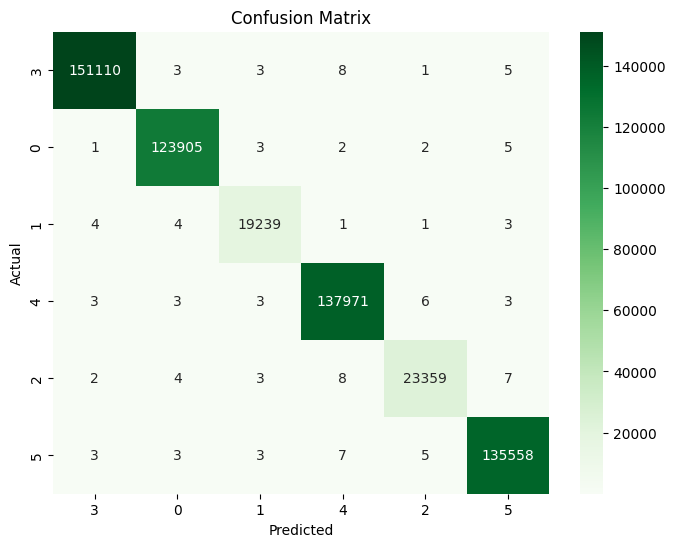

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
X_pred = classifier.predict(X_train)

cm = confusion_matrix(y_train, X_pred)
labels = train_data["cluster_catgeory"].unique()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
print(f"XGBoost Train Model Accuracy: {accuracy_score(y_train, X_pred)}")

XGBoost Train Model Accuracy: 0.9998156451321013


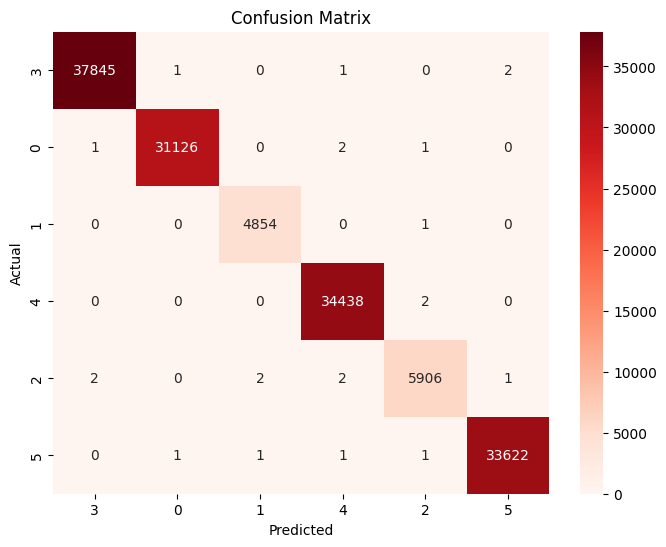

In [22]:
cm = confusion_matrix(y_test, y_pred)
labels = train_data["cluster_catgeory"].unique()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
print(f"XGBoost Test Model Accuracy: {accuracy_score(y_test, y_pred)}")

XGBoost Test Model Accuracy: 0.9998511632941622


In [24]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))
print("Total Error: {:.2f}%".format((1 - accuracies).mean()*100))

Accuracy: 99.98 %
Standard Deviation: 0.00%
Total Error: 0.02%


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37849
           1       1.00      1.00      1.00     31130
           2       1.00      1.00      1.00      4855
           3       1.00      1.00      1.00     34440
           4       1.00      1.00      1.00      5913
           5       1.00      1.00      1.00     33626

    accuracy                           1.00    147813
   macro avg       1.00      1.00      1.00    147813
weighted avg       1.00      1.00      1.00    147813



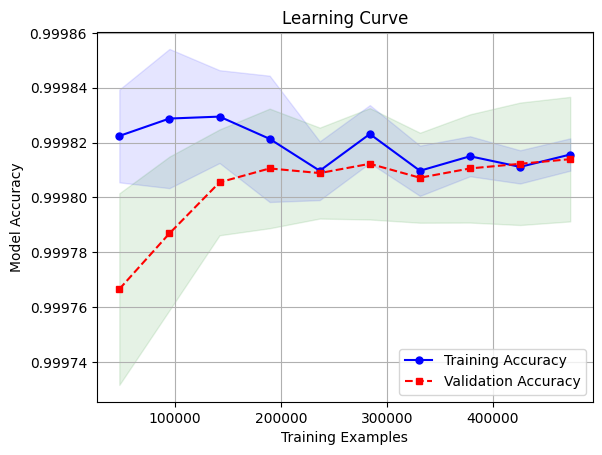

In [26]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator = classifier, X = X_train, y =  y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue', marker = 'o', markersize = 5)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color = 'blue')
plt.plot(train_sizes, test_mean, color='red', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.grid()
plt.xlabel('Training Examples')
plt.ylabel('Model Accuracy')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()

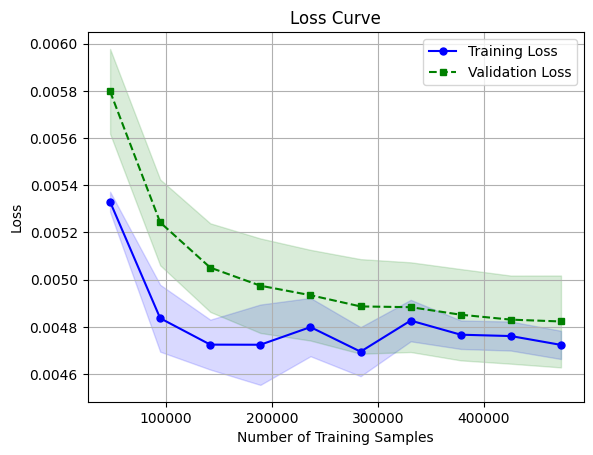

In [27]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = classifier, X = X_train,
                                                        y = y_train, cv = 5, scoring = 'neg_log_loss',
                                                        train_sizes = np.linspace(0.1, 1.0, 10),
                                                        n_jobs = -1)

train_mean = -np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = -np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'Training Loss')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.plot(train_sizes, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5, label = 'Validation Loss')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of Training Samples')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend(loc = 'upper right')
plt.show()